In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
valid_prob_file ="/hpcfs/juno/junogpu/fuys/game/hw_game2/hw_text_classification/data/game_data/data_enhance/"

<Figure size 432x288 with 0 Axes>

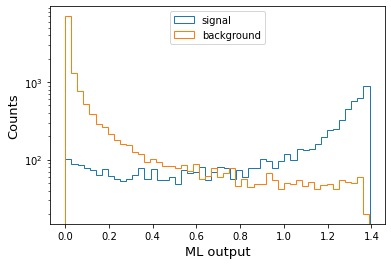

<Figure size 432x288 with 0 Axes>

In [7]:
P_data = np.load(os.path.join(valid_prob_file,"LGBMdataenhance_P_prob.npy"))
U_data = np.load(os.path.join(valid_prob_file,"LGBMdataenhance_U_prob.npy"))
bins=50

n_signal,sbins,patches = plt.hist(P_data,bins,histtype='step',label='signal')#,density=True)
n_background,bbins,patches = plt.hist(U_data,bins,histtype='step',label='background')#,density=True)#,alpha=0.3)
plt.legend(loc='upper center')
plt.xlabel('ML output',size=13)
plt.ylabel('Counts',size=13)
plt.yscale('log')
plt.figure()

0.8758901322482198
0.8277741443209069
0.32723600722101537


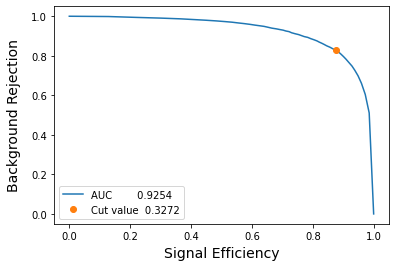

In [8]:
TextRNN_roc_bkg =[]
TextRNN_roc_bkg =[]

TextRNN_tag_x = 0
TextRNN_tag_y = 0

if 1>0:
    signal_data = np.append(0,n_signal)
    background_data = np.append(0,n_background)
    roc_signal = []
    roc_background = []
    signal_value = 0
    background_value = 0
    F_value = 0
    Count_value = 0
    for count in range(len(signal_data)):
        signal_value+=signal_data[count]
        background_value+=background_data[count]

        # calculate F value: sigeff*bkgrej/(sigeff+bkgrej)
        f_value_tem =(1-signal_value/sum(signal_data))*(background_value/sum(background_data))/((1-signal_value/sum(signal_data))+background_value/sum(background_data))
        if F_value < f_value_tem:
            F_value = f_value_tem
            point_x = 1-signal_value/sum(signal_data)
            point_y = background_value/sum(background_data)
            Count_value = count/len(signal_data)*(sbins[-1]-sbins[0])
        
        #if count == int(0.8*len(signal_data)):
        #    point_x = 1-signal_value/sum(signal_data)
        #    point_y = background_value/sum(background_data)
        
        roc_signal.append(1-signal_value/sum(signal_data))
        roc_background.append(background_value/sum(background_data))

    if 1>0:
        TextRNN_roc_sig = roc_signal
        TextRNN_roc_bkg = roc_background
        TextRNN_tag_x = point_x
        TextRNN_tag_y = point_y
        print(point_x)
        print(point_y)
        print(Count_value)


area_TextRNN = np.trapz(TextRNN_roc_sig,TextRNN_roc_bkg)

plt.plot(TextRNN_roc_sig,TextRNN_roc_bkg,label='AUC        %0.4f'%(area_TextRNN))
plt.plot(TextRNN_tag_x,TextRNN_tag_y,'o',label='Cut value  %0.4f'%(Count_value))
plt.xlabel('Signal Efficiency',size=14,labelpad=5)
plt.ylabel('Background Rejection',size=14,labelpad=10)
plt.legend()
